In [1]:
#2021.06.28. MON 
#Hankyeong

#00. 패키지 호출 
import numpy as np
import pandas as pd 
import tensorflow as tf 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

#00-1. 씨드넘버 정의하기. 
np.random.seed(2021)
tf.random.set_seed(2021)

#00-2. 시각화 옵션 설정하기. 
%matplotlib inline


In [2]:
#05. Boston 데이터셋으로 집값 예상하기. 
#(1) 데이터셋 불러오기 및 살펴보기. 
boston = pd.read_csv('../../data/boston.csv')
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
#(2) 데이터셋 탐색하기. 
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#(3) 결측값 유무 확인하기. 
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [6]:
#(4) feature 스케일링 전처리하기. 
X_scaled = MinMaxScaler().fit_transform(boston.iloc[:,:-1])

#(5) train, test 데이터셋 분류하기. 
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, boston.iloc[:,-1], test_size=0.2, random_state=2021
)

#(6) train, test 데이터셋 차원 확인하기. 
X_train.shape, y_train.shape, X_test.shape , y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [7]:
#(7) 모델 정의하기. 
model = Sequential([
    Dense(36, input_dim=13, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1)
])

#(8) 모델의 요약 정보 확인하기. 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                504       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                888       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 1,417
Trainable params: 1,417
Non-trainable params: 0
_________________________________________________________________


In [8]:
#(9) 모델 실행환경(컴파일) 설정하기. 
model.compile(
    loss='mean_squared_error', 
    optimizer='adam',
    metrics='mean_squared_error'
)

#(10) 모델 학습하기. 
model_fit = model.fit(
    X_train, y_train, 
    validation_split=0.2,
    epochs=200,
    batch_size=30,
    verbose=1)

=============================] - 0s 4ms/step - loss: 22.1651 - mean_squared_error: 22.1651 - val_loss: 16.4226 - val_mean_squared_error: 16.4226
Epoch 82/200
11/11 [==============================] - 0s 4ms/step - loss: 21.9646 - mean_squared_error: 21.9646 - val_loss: 16.3211 - val_mean_squared_error: 16.3211
Epoch 83/200
11/11 [==============================] - 0s 4ms/step - loss: 21.8049 - mean_squared_error: 21.8049 - val_loss: 16.2774 - val_mean_squared_error: 16.2774
Epoch 84/200
11/11 [==============================] - 0s 4ms/step - loss: 22.0183 - mean_squared_error: 22.0183 - val_loss: 16.1413 - val_mean_squared_error: 16.1413
Epoch 85/200
11/11 [==============================] - 0s 4ms/step - loss: 21.5145 - mean_squared_error: 21.5145 - val_loss: 16.2685 - val_mean_squared_error: 16.2685
Epoch 86/200
11/11 [==============================] - 0s 4ms/step - loss: 21.3911 - mean_squared_error: 21.3911 - val_loss: 16.0284 - val_mean_squared_error: 16.0284
Epoch 87/200
11/11 [=====

In [9]:
#(11) 모델 예측 및 평가하기.   
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 24.9911 - mean_squared_error: 24.9911


[24.991077423095703, 24.991077423095703]

In [10]:
#(12) 모델 예측값구하기. 
model_pred = model.predict(X_test).flatten()

#(13) 모델 예측값과 실제값 비교하기. 
df_comparasion = pd.DataFrame({
    'target'          : y_test,
    'model_pred' : model_pred
})
df_comparasion

,target,model_pred
210,21.7,19.049053
24,15.6,16.268038
36,20.0,20.116987
439,12.8,13.758284
161,50.0,42.678402
...,...,...
8,16.5,12.223010
317,19.8,16.998598
390,15.1,15.744994
482,25.0,36.111950


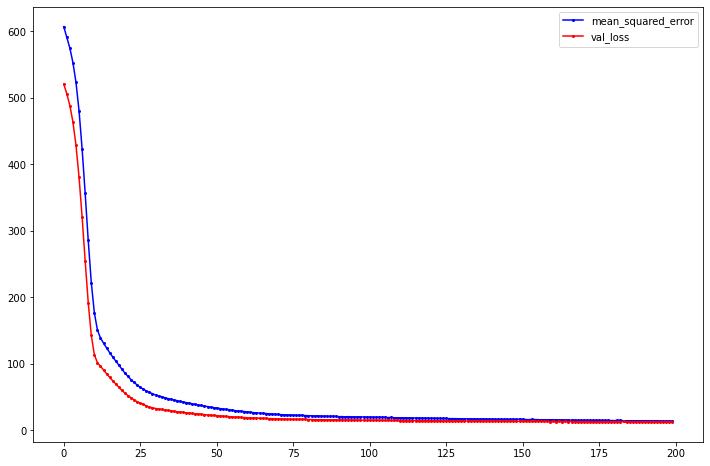

In [11]:
#(14) 훈련과정 시각화하기. 
y_acc = model_fit.history['mean_squared_error']
y_vloss = model_fit.history['val_loss']
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='mean_squared_error')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()